In [111]:
# Initialize Otter
import otter
grader = otter.Notebook("midterm-2.ipynb")

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

This dataset corresponds to the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). The data is downloaded from this link below:

https://catalog.data.gov/dataset/electric-vehicle-population-data

We will assume that: 
* the `Electric Range` column shows the value in miles.
* Base MSRP is the price of the car
* State column provides us the US state codes


In [113]:
ev = pd.read_csv("ev.csv")
ev.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


# EDA and predictive analytics

We will perform EDA and predictive analytics on this WA registered electric vehicle dataset. Ensure that you have the title, x/y-labels are set appropriately and your diagrams are meaningful, for all questions that ask you to plot a diagram, to receive full credit.

<!-- BEGIN QUESTION -->

## Question 1(a) (1 pt)

How many unique values are present in the `State` column in this dataset?
Hard coded answers will not get credit. Your answer should be derived from an expression using the `ev` dataframe

In [114]:
n_unique_states = ev["State"].unique().size

In [115]:
grader.check("1a")

1a results: All test cases passed!

<!-- END QUESTION -->

## Question 1(b) (1 pt)
Find the 3 most popular makes (look into the `Make` column) in this dataset. Get the results as a Series object, with the index being the **make** and the values being the **counts** and display them in the descending order of their count.

In [116]:
popular_makes_count = ev.groupby("Make").size().nlargest(3)

In [117]:
popular_makes_count

Make
TESLA        79659
NISSAN       13998
CHEVROLET    13678
dtype: int64

In [118]:
grader.check("1b")

1b results: All test cases passed!

## Question 1(c) (1 pt)
We will now work on other columns. However, you will notice that column names have spaces and are also mixed cases. Let us clean that up by replacing the space with an underscore and also make the column names  lowercase.

Hint: One of the easiest ways of doing this is to use `str` accessor of the df.columns. Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods


In [119]:
ev.columns = ev.columns.str.lower().str.replace(" ", "_")
ev.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

In [120]:
grader.check("1c")

1c results: All test cases passed!

<!-- BEGIN QUESTION -->

## ## Question 2(a) (2 pt)

Filter the dataset to include only records corresponding to the top 3 makes (look at the answer to 1b) and visualize the distribution of their models using an appropriate chart. Present the distribution in descending order of the count.


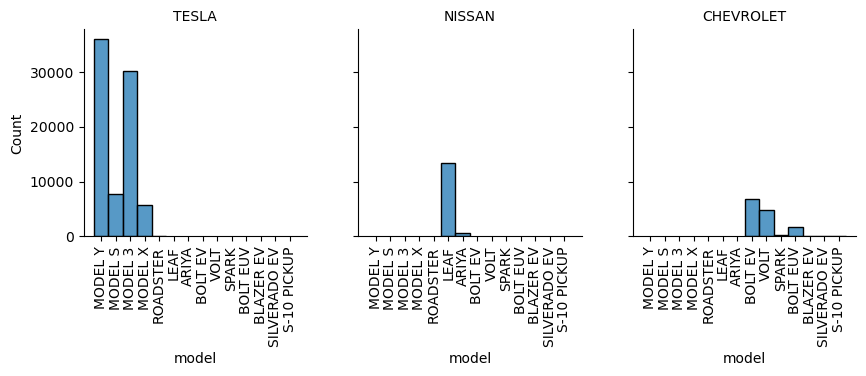

In [121]:
top_3_makes = ev[ev["make"].isin(popular_makes_count.index.tolist())]
# top_3_makes
top_3_plot = sns.FacetGrid(top_3_makes, col='make')
top_3_plot.map(sns.histplot, 'model')
top_3_plot.set_xticklabels(rotation=90)
top_3_plot.set_titles('{col_name}')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2(b) (1 pt)

Plot a suitable chart to show the distribution of values in the column `electric_range`

In [122]:
range_distribution = ...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 3(a) (2 pt)

Filter the records to exclude those with a `base_msrp` value of `0` and only include vehicles classified as `Battery Electric Vehicles (BEV)` in the `electric_vehicle_type` column. Next, determine if there is any correlation, whether positive or negative, between the `base_msrp` column and other numerical column values. Then, identify and list only those column names demonstrating a strong correlation (correlation coefficient >= |0.8|) with the `base_msrp` price column. Finally, provide an explanation of how the `base_msrp` is influenced based on the strongly correlated columns.

Hint: You may use the `corr` function 

In [123]:
# Your solution here
ev_filt = ev[(ev["base_msrp"] > 0) &  (ev["electric_vehicle_type"] == 'Battery Electric Vehicle (BEV)')]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 3(b) (2 pts)

Construct a linear regression model using the **two of the highly correlated columns** as features (refer the answer you derived in the previous question where you found the highly correlated column names to the `base_msrp` column). 

Your friend from WA is saving up money to buy a Battery Electric Vehicle with an electric_range of 210 miles in the year 2026.
Using your model, please help your friend decide on how much should be saved by 2026 to buy an electric car? (in other words, predict the base_msrp for a Battery Electric Vehicle for the year 2026 with an electric_range of 210 miles)

A lot of boiler plate code is already inserted for your convenience. Please complete only the incomplete statements and leave the rest alone

Hint: You will use the `ev_filt` dataframe from the previous question

In [124]:
# The data is split into test and train for you
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = ev_filt[['model_year', 'electric_range']]

y = ev_filt.base_msrp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

linear_model = LinearRegression()

...

# use the kept aside test data to fill in y_pred
y_pred = train_test_split(X, y, test_size = 0.2, random_state = 42)

# the required dataframe has been created for you already for prediction
pred_df = pd.DataFrame({'model_year':[2026], 'electric_range':[210]})
predicted_price = 


SyntaxError: invalid syntax (1700734030.py, line 22)

<!-- END QUESTION -->

## After submitting the exam...things to ponder

Do you truly believe that electric vehicle prices will plummet to such levels by 2026? As we project further into the future, there's a point where our current model predicts a negative base MSRP, suggesting that manufacturers would not only provide the electric vehicle but also pay consumers to purchase it. That scenario doesn't seem plausible at all.

This basic model lacks the sophistication required, necessitating additional inputs. While the costs of computer and software components in electric vehicles may decrease over time, other materials integral to EV production are unlikely to follow suit. Moreover, the expenses associated with computer and software components won't transition into negative territory. Thus, a more intricate model is essential for improved accuracy. Consider this exercise as a starting point for refining our modeling process.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload this .zip file to Gradescope for grading.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)